# Data 

In [3]:
from module.data_processing import collect_sign_data,organize_data, create_dataloaders
from module.mediapipe_utils import setup_holistic_model
from module.helper_functions import get_cam_idx

## Create data

In [19]:
camera_idx= get_cam_idx()
# Check if the camera index is valid
if camera_idx is None:
    print("No valid camera index found. Please check your camera settings.")
new_sign = input("Enter the name of the sign you want to collect data for: ")
num_seq = int(input("Enter the number of sequences to collect (default: 30): ") or 30)
seq_length = int(input("Enter the number of frames per sequence (default: 30): ") or 30)

print(f"\nPreparing to collect data for sign: '{new_sign}'")
print("Position yourself in front of the camera.")
print("Press Enter to start...")
input()

# Create holistic model for data collection
with setup_holistic_model() as holistic:
    collect_sign_data(new_sign, holistic, num_seq, seq_length, camera_idx)

# Update the actions list
if os.path.exists('data'):
    actions = [action for action in os.listdir('data') if not action.startswith('.')]
    print(f"Updated available signs: {actions}")


Preparing to collect data for sign: ''
Position yourself in front of the camera.
Press Enter to start...


I0000 00:00:1747500485.027377 1578135 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1747500485.109675 1597737 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747500485.124238 1597737 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747500485.127024 1597740 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747500485.127097 1597737 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747500485.127472 1597735 inference_feedback_manager.cc:114] Feedback manager requires a mod

KeyboardInterrupt: 

## Explore data

In [5]:
import numpy as np
import os
from module.helper_functions import get_data_path

# Get path to data directory
data_path = get_data_path()
print(f"Data path: {data_path}")

# List available actions/signs
actions = [action for action in os.listdir(data_path) if not action.startswith('.')]
if actions:
    print(f"Available signs: {actions}")
    
    # Pick the first action
    action = actions[0]
    
    # Get sequences for this action
    sequences = [seq for seq in os.listdir(os.path.join(data_path, action)) if not seq.startswith('.')]
    if sequences:
        # Pick the first sequence
        sequence = sequences[0]
        
        # Get frames for this sequence
        frames = [f for f in os.listdir(os.path.join(data_path, action, sequence)) if f.endswith('.npy')]
        if frames:
            # Pick the first frame
            frame = frames[0]
            
            # Full path to the file
            file_path = os.path.join(data_path, action, sequence, frame)
            print(f"Opening file: {file_path}")
            
            # Load the data and show shape
            data = np.load(file_path)
            print(f"Data shape: {data.shape}")
            
            # Show more details about the data structure
            print(f"Data type: {data.dtype}")
            
            # Show first few values
            print(f"First 10 values: {data[:10]}")
            
            # If we expect specific structure (126 values - 63 for each hand)
            if len(data) >= 126:
                left_hand = data[:63]
                right_hand = data[63:126]
                pose = data[126:]
                print(f"Left hand data shape: {left_hand.shape}")
                print(f"Right hand data shape: {right_hand.shape}")
                print(f"Pose data shape: {pose.shape}")
else:
    print("No sign data found in the data directory.")

Data path: /Users/mandev/Library/CloudStorage/OneDrive-man1605/Sign_Language/data
Available signs: ['nice', 'how', 'no', 'thankyou', 'understand', 'take care', 'goodbye', 'later', 'hello', 'you', 'yes', 'SPACE', 'fine']
Opening file: /Users/mandev/Library/CloudStorage/OneDrive-man1605/Sign_Language/data/nice/thinh_27/20.npy
Data shape: (225,)
Data type: float64
First 10 values: [ 0.52879113  0.34216291 -0.42250499  0.55527371  0.27679029 -0.37925655
  0.56517237  0.27940774 -0.37912342  0.57664025]
Left hand data shape: (63,)
Right hand data shape: (63,)
Pose data shape: (99,)


## Organize data

In [4]:
organize_data(train_split = 0.8 )


Removing existing directory: data_train
Removing existing directory: data_test
Data organized into data_train and data_test directories
Training data: 80%, Testing data: 20%


## Create DataLoader    

In [6]:
train_dataloader, test_dataloader, class_names = create_dataloaders(
    "data_train",
    "data_test",
    batch_size=32,
    num_workers=0,
)

print("DataLoaders created successfully")

# Test a single batch
print("\nFetching a single batch from training dataloader...")
for batch in train_dataloader:
    # The dataset returns a tuple of (data, label) not a dictionary
    inputs, labels = batch
    print(f"Batch data shape: {inputs.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels: {labels}")
    break
    
print("\nFetching a single batch from testing dataloader...")
for batch in test_dataloader:
    # The dataset returns a tuple of (data, label) not a dictionary
    inputs, labels = batch
    print(f"Batch data shape: {inputs.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Batch labels: {labels}")
    break

DataLoaders created successfully

Fetching a single batch from training dataloader...
Batch data shape: torch.Size([32, 30, 225])
Batch labels shape: torch.Size([32])
Batch labels: tensor([ 7, 10,  8, 12,  7,  1,  8,  4, 11,  4,  7,  8,  7, 10,  9, 11, 10,  1,
        12,  7, 11,  5, 12,  7,  9,  7,  1,  8,  7,  5, 12, 11])

Fetching a single batch from testing dataloader...
Batch data shape: torch.Size([32, 30, 225])
Batch labels shape: torch.Size([32])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        4, 4, 4, 4, 4, 4, 5, 5])
Batch data shape: torch.Size([32, 30, 225])
Batch labels shape: torch.Size([32])
Batch labels: tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        4, 4, 4, 4, 4, 4, 5, 5])


# Model and Train

In [7]:
import torch
import torch.nn as nn
from module.sign_model_builder import SignLanguageLSTM
from module.model_utils import train
input_size = 225  # Input features size
hidden_sizes = [128, 64, 32] 
output_size = len(class_names)  # Number of classes
learning_rate = 0.001

model = SignLanguageLSTM(input_size, hidden_sizes, output_size)
print("Model created successfully")

criterion = nn.NLLLoss()  # Changed to NLLLoss for softmax outputs
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)

# Check if GPU is available and move model to GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")


Model created successfully
Using device: cpu


/Users/mandev/Workspace/UNI/ChuyenNganh/venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## Training

In [31]:
results = train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=criterion,
    optimizer=optimizer,
    epochs=100,
    device=device,
    scheduler=scheduler,
    use_log_softmax=True  # Enable log softmax transformation
)


TensorBoard logs will be saved to /Users/mandev/Library/CloudStorage/OneDrive-man1605/Sign_Language/runs/20250517-235920


Total Progress:  10%|▉         | 109/1100 [00:10<01:13, 13.42it/s]

Epoch: 10/100 | train_loss: 1.7006 | train_acc: 0.3807 | test_loss: 1.6559 | test_acc: 0.3373
Current learning rate: 0.001000


Total Progress:  20%|█▉        | 218/1100 [00:18<01:02, 14.12it/s]

Epoch: 20/100 | train_loss: 1.2151 | train_acc: 0.4471 | test_loss: 1.2146 | test_acc: 0.4337
Current learning rate: 0.001000


Total Progress:  30%|██▉       | 329/1100 [00:28<00:56, 13.69it/s]

Epoch: 30/100 | train_loss: 1.1360 | train_acc: 0.5045 | test_loss: 1.1800 | test_acc: 0.4819
Current learning rate: 0.000500


Total Progress:  40%|████      | 440/1100 [00:38<00:52, 12.47it/s]

Epoch: 40/100 | train_loss: 1.0787 | train_acc: 0.5227 | test_loss: 1.1595 | test_acc: 0.4940
Current learning rate: 0.000500


Total Progress:  50%|█████     | 550/1100 [00:51<00:45, 11.97it/s]

Epoch: 50/100 | train_loss: 1.0163 | train_acc: 0.5770 | test_loss: 1.0806 | test_acc: 0.5542
Current learning rate: 0.000500


Total Progress:  60%|██████    | 660/1100 [01:01<00:33, 13.22it/s]

Epoch: 60/100 | train_loss: 0.9764 | train_acc: 0.6103 | test_loss: 1.0516 | test_acc: 0.5783
Current learning rate: 0.000500


Total Progress:  70%|███████   | 770/1100 [01:12<00:39,  8.30it/s]

Epoch: 70/100 | train_loss: 0.8329 | train_acc: 0.6918 | test_loss: 1.0044 | test_acc: 0.5904
Current learning rate: 0.000500


Total Progress:  80%|███████▉  | 879/1100 [01:24<00:24,  9.14it/s]

Epoch: 80/100 | train_loss: 0.8385 | train_acc: 0.6949 | test_loss: 0.9930 | test_acc: 0.6145
Current learning rate: 0.000500


Total Progress:  90%|████████▉ | 989/1100 [01:37<00:13,  8.41it/s]

Epoch: 90/100 | train_loss: 0.7143 | train_acc: 0.7130 | test_loss: 0.9317 | test_acc: 0.6506
Current learning rate: 0.000125


Total Progress: 100%|██████████| 1100/1100 [01:54<00:00,  9.59it/s]

Epoch: 100/100 | train_loss: 0.6858 | train_acc: 0.7704 | test_loss: 0.9150 | test_acc: 0.7229
Current learning rate: 0.000031


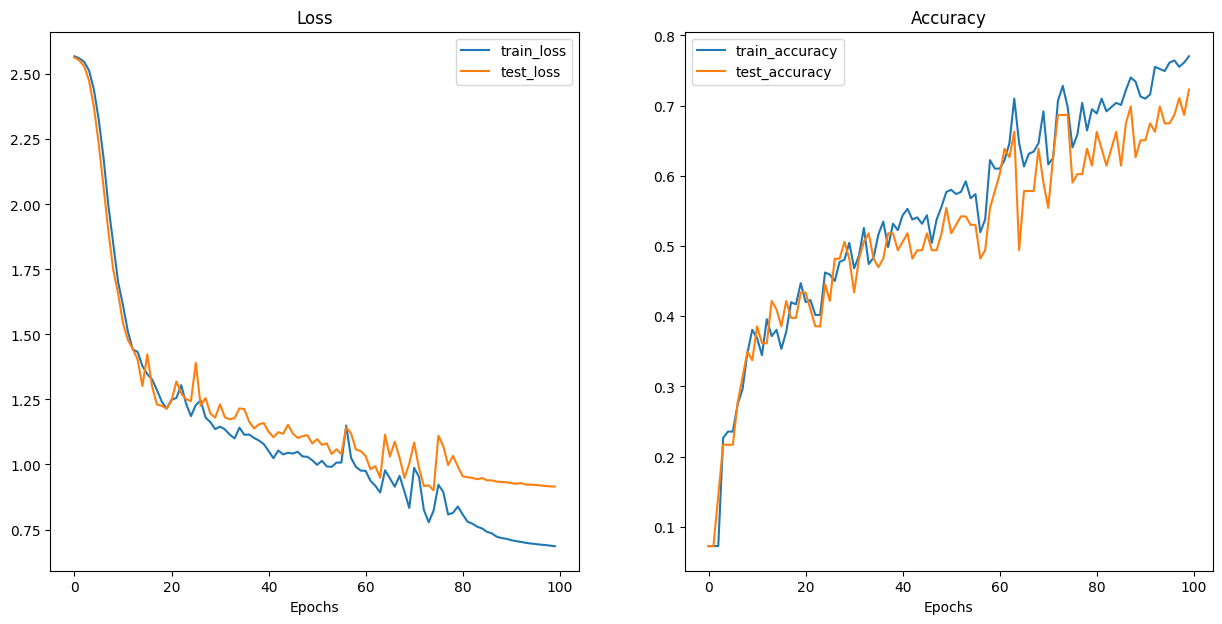

In [32]:
from module.helper_functions import plot_loss_curves

plot_loss_curves(results)

In [33]:



try:
    print("Starting TensorBoard as a subprocess...")
    !{python_exec} -m tensorboard.main --logdir={tb_path}
except Exception as e:
    print(f"Failed to start TensorBoard as subprocess: {e}")

print("")
print("If TensorBoard still doesn't launch, try running this command in your terminal:")
print(f"cd {os.getcwd()} && tensorboard --logdir=runs")

Starting TensorBoard as a subprocess...
TensorFlow installation not found - running with reduced feature set.
TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.19.0 at http://localhost:6007/ (Press CTRL+C to quit)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.19.0 at http://localhost:6007/ (Press CTRL+C to quit)
^C

If TensorBoard still doesn't launch, try running this command in your terminal:
cd /Users/mandev/Workspace/UNI/ChuyenNganh && tensorboard --logdir=runs


## Real-time ASL Detection

## Installation for Text-to-Speech

Before running the detection code with speech synthesis, you'll need to install the `pyttsx3` package:

In [ ]:
# Install required packages for text-to-speech
!pip install pyttsx3


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Virtual Microphone Setup

To use the virtual microphone functionality, you'll need to install and configure a virtual audio device on your operating system:

### For macOS:
1. Install Soundflower or BlackHole:
   - [BlackHole](https://github.com/ExistentialAudio/BlackHole) (recommended)
   - [Soundflower](https://github.com/mattingalls/Soundflower)

2. Configure your system to use the virtual audio device in System Preferences > Sound

### For Windows:
1. Install VB-Cable Virtual Audio Device:
   - [VB-Cable](https://vb-audio.com/Cable/)

2. Configure your system to use VB-Cable as both an output and input device

### For Linux:
1. Use PulseAudio or JACK with a loopback device:
   ```bash
   pactl load-module module-null-sink sink_name=virtual_speaker sink_properties=device.description=VirtualSpeaker
   pactl load-module module-loopback source=virtual_speaker.monitor sink=your_microphone_device
   ```

### Integration with the Sign Language System:

Once you have set up a virtual audio device, the text-to-speech output will be routed through your computer's speakers by default. To route it through the virtual microphone, you would need to:

1. Configure your system's output to go to the virtual audio device
2. Set the virtual audio device as an input in your conferencing/communication software

The current implementation includes a placeholder for virtual mic integration. For a complete integration, you would need to use a more advanced text-to-speech library that allows specifying an output device, or use system-level audio routing.

## Usage Instructions

The enhanced sign language detection system now includes text-to-speech and virtual microphone support. Here's how to use these features:

### Controls:
- **Press 'q'**: Quit the application
- **Press 's'**: Toggle speech on/off
- **Press 'v'**: Toggle virtual microphone on/off

### Features:
1. **Text-to-Speech**: When enabled, the system will speak the detected sign language gestures out loud through your speakers.
2. **Virtual Microphone**: When enabled, the system will attempt to route the speech through a virtual microphone (requires setup of a virtual audio device as described above).
3. **Status Display**: The bottom of the video window shows the current status of speech and virtual microphone features.

### Notes:
- Speech has a cooldown period to prevent constant speaking when the same sign is detected repeatedly
- The system maintains a history of recently spoken words to reduce repetition
- For best results with the virtual microphone feature, use a dedicated virtual audio routing software

## Advanced Virtual Microphone Integration (Optional)

For more advanced virtual microphone integration, you might want to use platform-specific libraries. Here's an example of how you could extend the current implementation:

In [ ]:
# This is an optional code example that demonstrates more advanced virtual mic integration
# You would need to install the appropriate packages depending on your OS

# Example for macOS with PyAudio and a virtual audio device like BlackHole
'''
import pyaudio
import wave
import numpy as np
import threading
import time

class VirtualMicManager:
    def __init__(self):
        self.active = False
        self.p = pyaudio.PyAudio()
        self.output_device_index = None  # You'll need to find this index
        
        # Find the virtual output device
        for i in range(self.p.get_device_count()):
            dev_info = self.p.get_device_info_by_index(i)
            if "BlackHole" in dev_info["name"]:  # Or "Soundflower", "VB-Cable", etc.
                self.output_device_index = i
                print(f"Found virtual audio device: {dev_info['name']} at index {i}")
                break
                
        if self.output_device_index is None:
            print("No virtual audio device found. Please install BlackHole, Soundflower, or similar.")
    
    def start(self):
        if self.output_device_index is None:
            print("Cannot start virtual mic: No virtual audio device found")
            return False
        self.active = True
        return True
        
    def stop(self):
        self.active = False
    
    def play_audio(self, audio_data, sample_rate=16000):
        if not self.active or self.output_device_index is None:
            return
            
        # This is simplified - you'd need to properly format your audio
        stream = self.p.open(
            format=pyaudio.paFloat32,
            channels=1,
            rate=sample_rate,
            output=True,
            output_device_index=self.output_device_index
        )
        
        stream.write(audio_data)
        stream.stop_stream()
        stream.close()
        
    def speak_text(self, text):
        if not self.active:
            return
            
        # Here you would integrate with a TTS system that returns audio data
        # This is a placeholder - you'd need a TTS system that returns raw audio
        # audio_data = text_to_speech_as_audio_data(text)
        # self.play_audio(audio_data)
        print(f"Virtual mic would speak: {text}")

# Usage example:
# virtual_mic = VirtualMicManager()
# virtual_mic.start()
# virtual_mic.speak_text("Hello world")
# virtual_mic.stop()
'''

# The above code is commented out since it requires additional setup
# and packages not covered in the basic implementation
print("Advanced virtual microphone integration requires additional setup.")
print("Please refer to the markdown cell above for more information.")


In [ ]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F
import mediapipe as mp
import time
import os
import subprocess
import threading
import traceback
from module.helper_functions import get_cam_idx
from module.helper_functions import get_model_path
from module.mediapipe_utils import mediapipe_detection, extract_keypoints
from module.sign_model_builder import SignLanguageLSTM

input_size = 225  # Input features size
hidden_sizes = [128, 64, 32] 
train_actions = [action for action in os.listdir("data_train") if os.path.isdir(os.path.join("data_train", action))]
num_classes = len(train_actions)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to use system text-to-speech instead of pyttsx3
def speak_with_system_tts(text):
    """Use the system's text-to-speech capabilities instead of pyttsx3"""
    try:
        # Determine the OS and use appropriate command
        if os.name == 'posix':  # macOS or Linux
            if os.path.exists('/usr/bin/say'):  # macOS
                subprocess.Popen(['say', text])
            else:  # Linux
                subprocess.Popen(['spd-say', text])
        elif os.name == 'nt':  # Windows
            import winsound
            # Just make a beep sound as Windows needs additional setup for TTS
            winsound.Beep(1000, 200)  
            # Print the text that would be spoken
            print(f"TTS would say: {text}")
    except Exception as e:
        print(f"Error in system TTS: {e}")

# Load the trained model if not already in memory
def load_model_if_needed():
    if 'trained_model' not in locals():
        model_path = get_model_path()
        model_file = os.path.join(model_path, "sign_language_model.pth")
        if os.path.exists(model_file):
            # Initialize model with same parameters as training
            model = SignLanguageLSTM(input_size, hidden_sizes, num_classes=num_classes).to(device)
            model.load_state_dict(torch.load(model_file))
            model.eval()  # Set to evaluation mode
            return model
        else:
            print(f"Model file not found at {model_file}")
            return None
    return trained_model

# Function to visualize probabilities
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, f'{actions[num]}: {prob:.2f}', 
                   (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

# Get trained model
model = load_model_if_needed()
if model is None:
    print("Please train the model first or make sure the model file exists.")
else:
    # Initialize detection variables
    sequence = []
    sentence = []
    spoken_sentence = []  # To keep track of what has been spoken
    predictions = []
    threshold = 0.7  # Confidence threshold for prediction
    last_speech_time = 0  # To prevent speaking too frequently
    speech_cooldown = 0.8  # Seconds to wait between speech outputs

    # Get list of actions from training directory
    actions = [action for action in os.listdir("data_train") if os.path.isdir(os.path.join("data_train", action))]
    print(f"Detecting the following actions: {actions}")

    # Colors for visualization
    colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

    # Initialize webcam
    cap = cv2.VideoCapture(2)  # Change this value if needed

    # Initialize flags for speech functionality
    speech_enabled = True
    print("Speech is enabled. Press 's' to toggle speech on/off")
    
    # Initialize virtual mic status
    virtual_mic_active = False
    print("Virtual mic is disabled. Press 'v' to toggle virtual mic on/off")

    # Initialize MediaPipe model
    with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        try:
            while cap.isOpened():
                # Read frame
                ret, frame = cap.read()
                if not ret:
                    print("Failed to grab frame")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                from module.mediapipe_utils import draw_landmarks
                draw_landmarks(image, results)

                # Extract keypoints and add to sequence
                keypoints = extract_keypoints(results)
                sequence.append(keypoints)
                
                # Keep only the last 30 frames
                sequence = sequence[-30:]

                # Prediction logic when we have enough frames
                if len(sequence) == 30:
                    # Convert sequence to tensor and add batch dimension
                    input_data = torch.tensor(np.array(sequence), dtype=torch.float32).unsqueeze(0).to(device)
                    
                    # Get prediction
                    with torch.no_grad():
                        output = model(input_data)
                        # Convert from torch tensor to numpy
                        res = output.cpu().numpy()[0]
                        
                    # Get predicted class index
                    predicted_class = np.argmax(res)
                    print(f"Predicted: {actions[predicted_class]} with confidence {res[predicted_class]:.2f}")
                    predictions.append(predicted_class)

                    # Visualization logic
                    # Only add prediction to sentence if consistent over several frames
                    if len(predictions) > 10 and np.unique(predictions[-10:])[0] == predicted_class:
                        if res[predicted_class] > threshold:
                            current_sign = actions[predicted_class]
                            if len(sentence) == 0 or current_sign != sentence[-1]:
                                sentence.append(current_sign)
                                
                                # Text to speech functionality
                                current_time = time.time()
                                if speech_enabled and (current_time - last_speech_time > speech_cooldown):
                                    # Only speak if this sign hasn't been spoken recently
                                    if current_sign not in spoken_sentence[-3:] if spoken_sentence else True:
                                        # Use the system text-to-speech
                                        if not virtual_mic_active:
                                            speak_with_system_tts(current_sign)
                                        
                                        spoken_sentence.append(current_sign)
                                        last_speech_time = current_time

                                        # Virtual mic functionality
                                        if virtual_mic_active:
                                            print(f"Virtual Mic Output: '{current_sign}'")

                    # Limit sentence length
                    if len(sentence) > 5:
                        sentence = sentence[-5:]
                    
                    # Also limit spoken_sentence history
                    if len(spoken_sentence) > 10:
                        spoken_sentence = spoken_sentence[-10:]

                    # Visualize probabilities
                    image = prob_viz(res, actions, image, colors)

                # Display sentence
                cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, ' '.join(sentence), (3, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                
                # Display status of speech and virtual mic
                status_text = f"Speech: {'ON' if speech_enabled else 'OFF'} | Virtual Mic: {'ON' if virtual_mic_active else 'OFF'}"
                cv2.putText(image, status_text, (10, image.shape[0] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)

                # Show to screen
                cv2.imshow('Real-time Sign Language Detection', image)

                # Key controls
                key = cv2.waitKey(10) & 0xFF
                if key == ord('q'):  # Break loop with 'q' key
                    break
                elif key == ord('s'):  # Toggle speech with 's' key
                    speech_enabled = not speech_enabled
                    print(f"Speech {'enabled' if speech_enabled else 'disabled'}")
                elif key == ord('v'):  # Toggle virtual mic with 'v' key
                    virtual_mic_active = not virtual_mic_active
                    print(f"Virtual mic {'activated' if virtual_mic_active else 'deactivated'}")
        except Exception as e:
            print(f"Error in main loop: {e}")
            print(traceback.format_exc())
        finally:
            # Release resources
            cap.release()
            cv2.destroyAllWindows()            
            print("Application shutdown complete")

Detecting the following actions: ['nice', 'how', 'no', 'thankyou', 'understand', 'take care', 'goodbye', 'later', 'hello', 'you', 'yes', 'SPACE', 'fine']


2025-05-18 00:17:40.488 Python[22941:1646283] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Speech is enabled. Press 's' to toggle speech on/off
Virtual mic is disabled. Press 'v' to toggle virtual mic on/off


I0000 00:00:1747502261.665691 1646283 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1747502261.750829 1646430 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747502261.766578 1646434 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747502261.769040 1646427 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747502261.769081 1646430 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747502261.769572 1646434 inference_feedback_manager.cc:114] Feedback manager requires a mod

Predicted: SPACE with confidence 0.76
Predicted: SPACE with confidence 0.76
Predicted: SPACE with confidence 0.76
Predicted: SPACE with confidence 0.77
Predicted: SPACE with confidence 0.78
Predicted: SPACE with confidence 0.78
Predicted: SPACE with confidence 0.78
Predicted: SPACE with confidence 0.78
Predicted: SPACE with confidence 0.78
Predicted: SPACE with confidence 0.78
Predicted: SPACE with confidence 0.79
Predicted: SPACE with confidence 0.79
Predicted: SPACE with confidence 0.80
Predicted: SPACE with confidence 0.80
Predicted: SPACE with confidence 0.79
Predicted: SPACE with confidence 0.79
Predicted: SPACE with confidence 0.80
Predicted: SPACE with confidence 0.80
Predicted: SPACE with confidence 0.80
Predicted: SPACE with confidence 0.81
Predicted: SPACE with confidence 0.81
Predicted: SPACE with confidence 0.81
Predicted: SPACE with confidence 0.80
Predicted: SPACE with confidence 0.81
Predicted: SPACE with confidence 0.81
Predicted: SPACE with confidence 0.81
Predicted: S

: 